# Exploring data from Yahoo finance

In [1]:
#import sys
#import os
#sys.path.append('../')

#import yfinance as yf
#import backtrader as bt
#import pandas as pd
#from datetime import datetime

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  # To find out the script name (in argv[0])
import pandas as pd

# Import the backtrader platform
import backtrader as bt


In [2]:
modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
datapath = os.path.join(modpath, '../datas/yfinance')

In [4]:
btc = pd.read_csv('../datas/yfinance/BTC-USD.csv')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,22211859147
1,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,33346760979
2,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,20653160491
3,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,30695.468750,24115570085
4,2023-06-24,30708.738281,30804.148438,30290.146484,30548.695313,30548.695313,12147822496


In [5]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
start_date = btc['Date'].min()
end_date = btc['Date'].max()

start_date, end_date

(Timestamp('2023-06-20 00:00:00'), Timestamp('2024-06-20 00:00:00'))

## Initial plot

In [8]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Convert dates to Matplotlib date format
btc['Date'] = btc['Date'].apply(mdates.date2num)
ohlc = btc[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].values.tolist()

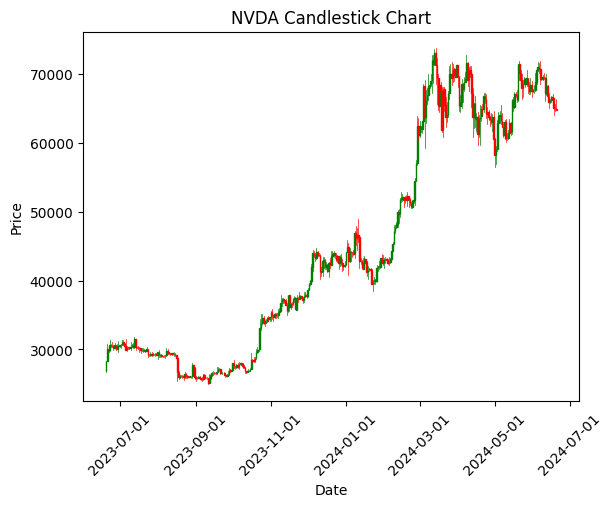

In [9]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot candlestick chart
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin K-line Chart')

# Display the plot
plt.show()


# Stratagys

### simple stratagy
Buy at the opening price of each day and sell at the closing price of the day

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Example Bitcoin K-line data (replace with your actual data)
btc = pd.DataFrame({
    'Date': ['2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24'],
    'Open': [26841.664063, 28311.310547, 29995.935547, 29896.382813, 30708.738281],
    'Close': [28327.488281, 30027.296875, 29912.281250, 30695.468750, 30548.695313]
})

initial_capital = 100000  # Example initial capital in USD
position = 0  # No initial position
capital = initial_capital
capital_over_time = [capital]

for index, row in btc.iterrows():
    if position == 0:  # Buy condition
        position = capital / row['Open']
        capital = 0
    elif position > 0:  # Sell condition
        capital = position * row['Close']
        position = 0
    
    capital_over_time.append(capital)

# Calculate final capital and returns
final_capital = capital
returns = (final_capital - initial_capital) / initial_capital * 100

print(f'Initial Capital: ${initial_capital:.2f}')
print(f'Final Capital: ${final_capital:.2f}')
print(f'Returns: {returns:.2f}%')


Initial Capital: $100000.00
Final Capital: $0.00
Returns: -100.00%


This highlights a crucial limitation of this approach.

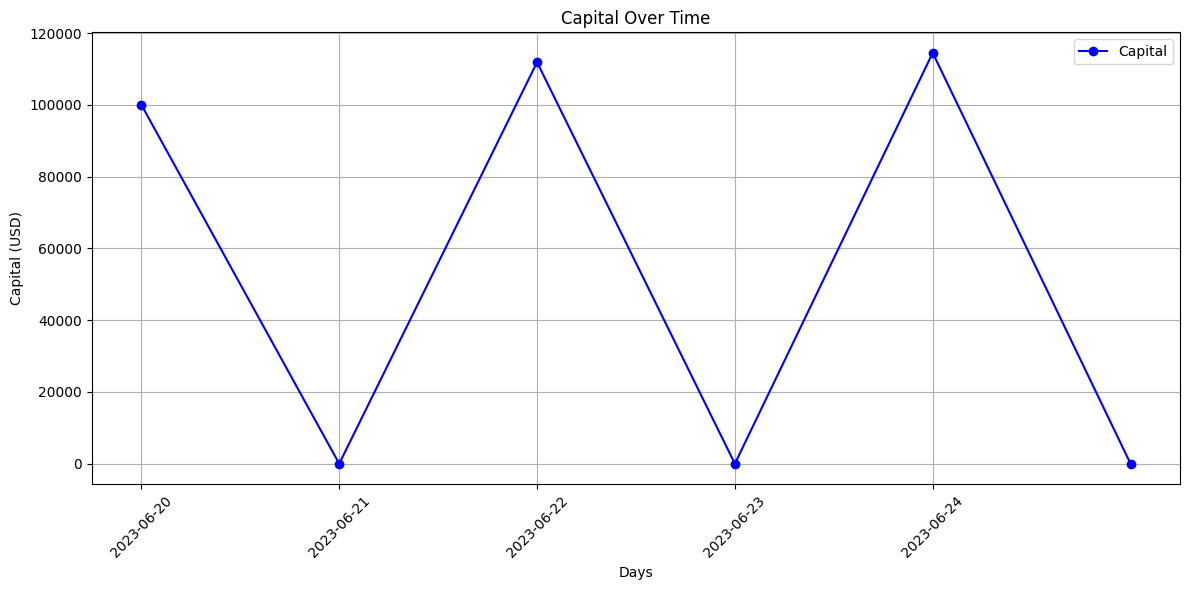

In [16]:
# Plotting the capital over time
plt.figure(figsize=(12, 6))
plt.plot(capital_over_time, marker='o', linestyle='-', color='b', label='Capital')
plt.title('Capital Over Time')
plt.xlabel('Days')
plt.ylabel('Capital (USD)')
plt.xticks(range(len(btc)), btc['Date'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()